In [6]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

In [7]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cloud.r-project.org


Bioconductor version 3.10 (BiocManager 1.30.16), R 3.6.3 (2020-02-29)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'DESeq2'”
Installation paths not writeable, unable to update packages
  path: /usr/lib/R/library
  packages:
    boot, class, cluster, codetools, KernSmooth, lattice, MASS, Matrix, mgcv,
    nlme, nnet, spatial, survival



In [8]:
install.packages("pheatmap")

Installing package into ‘/home/vladislav/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [9]:
library("DESeq2")
library("pheatmap")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [10]:
info   <- read.table("ALL.info", header=TRUE, row.names="sample")
counts <- as.matrix(read.table("ALL.counts", header=TRUE, row.names="geneID"))

dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)

In [11]:
head(info)

,id,condition
,<fct>,<fct>
c1,SRR3414629,control
c2,SRR3414630,control
c3,SRR3414631,control
r1,SRR3414635,reprogramming
r2,SRR3414636,reprogramming
r3,SRR3414637,reprogramming


In [12]:
head(counts)

,c1,c2,c3,r1,r2,r3
ENSMUSG00000000001.4,4489,3919,5700,3431,3504,4031
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,345,273,468,150,136,152
ENSMUSG00000000031.16,64504,33249,64992,55526,48225,56064
ENSMUSG00000000037.17,77,68,87,41,44,52
ENSMUSG00000000049.11,4,1,1,10,8,10


In [13]:
# Tell the DDS which columns correspond to the 'reference' level of gene expression
dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01)   # Specify a more strict threshold on padj. This threshold is called 'alpha'

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



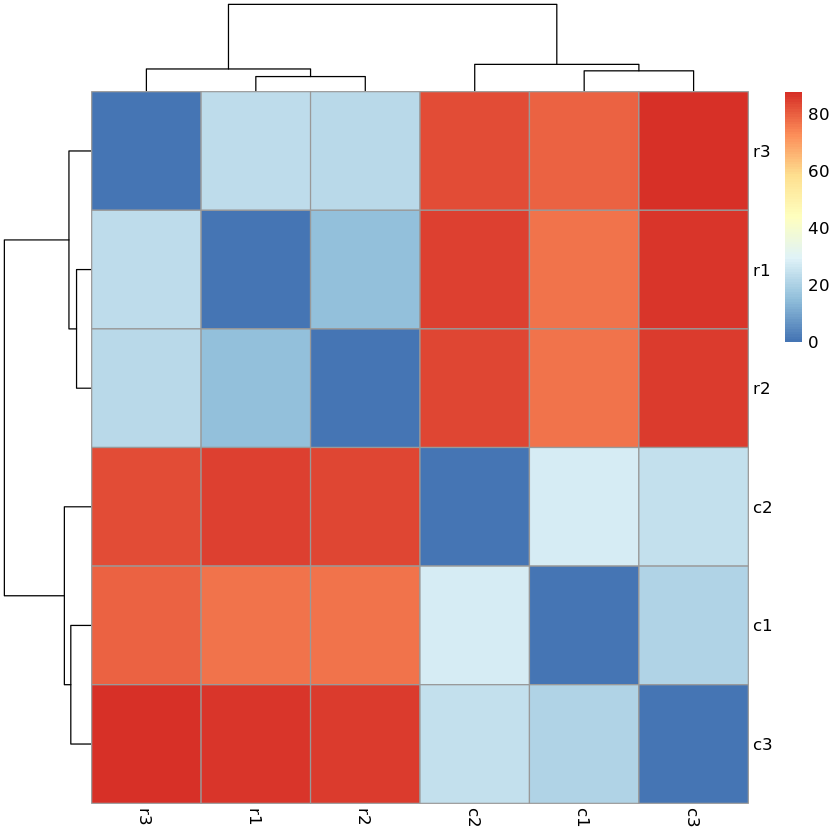

In [14]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)

In [15]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote = FALSE)

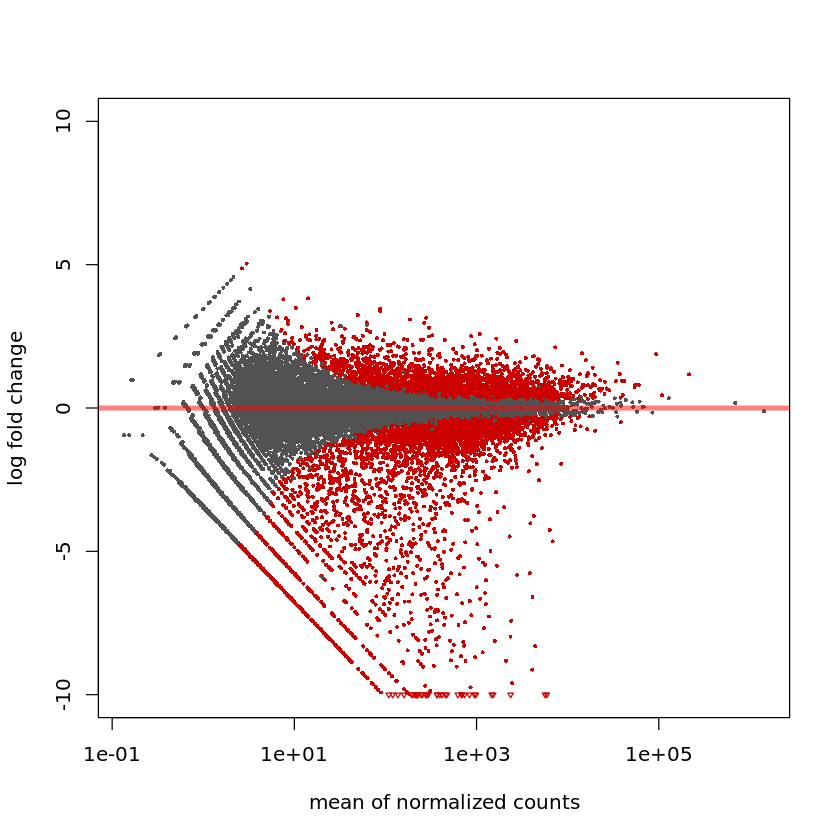

In [16]:
plotMA(res, ylim=c(-10,10))

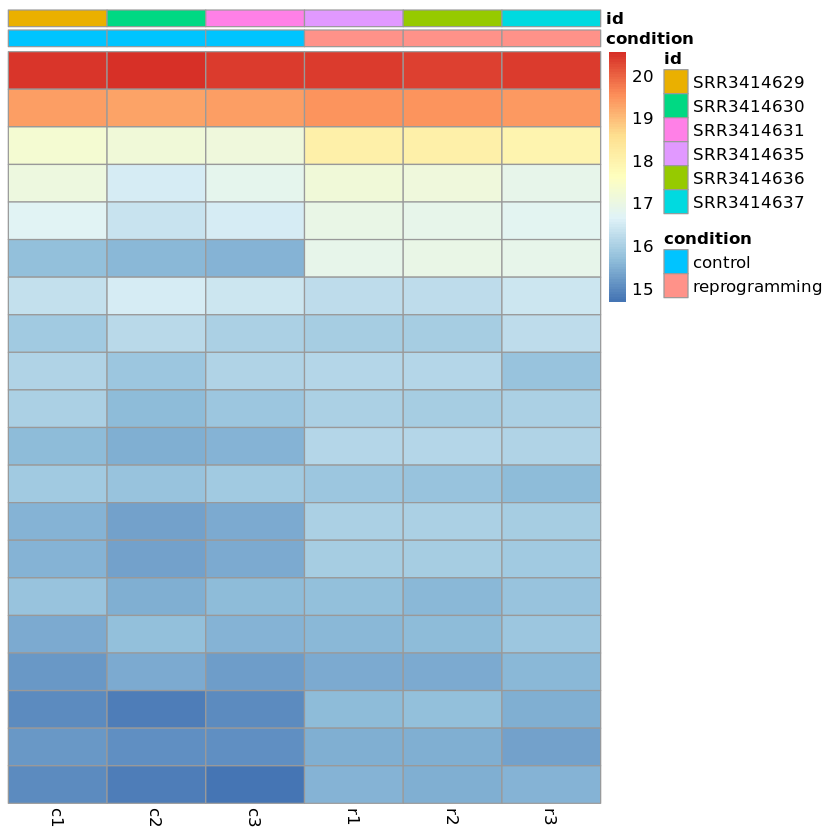

In [17]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                             baseMean     log2FoldChange             lfcSE
                            <numeric>          <numeric>         <numeric>
ENSMUSG00000000001.4 4129.42575381813 -0.337152976067855 0.111884069682793
                                  stat              pvalue                padj
                             <numeric>           <numeric>           <numeric>
ENSMUSG00000000001.4 -3.01341358983214 0.00258326595423689 0.00793042928363289

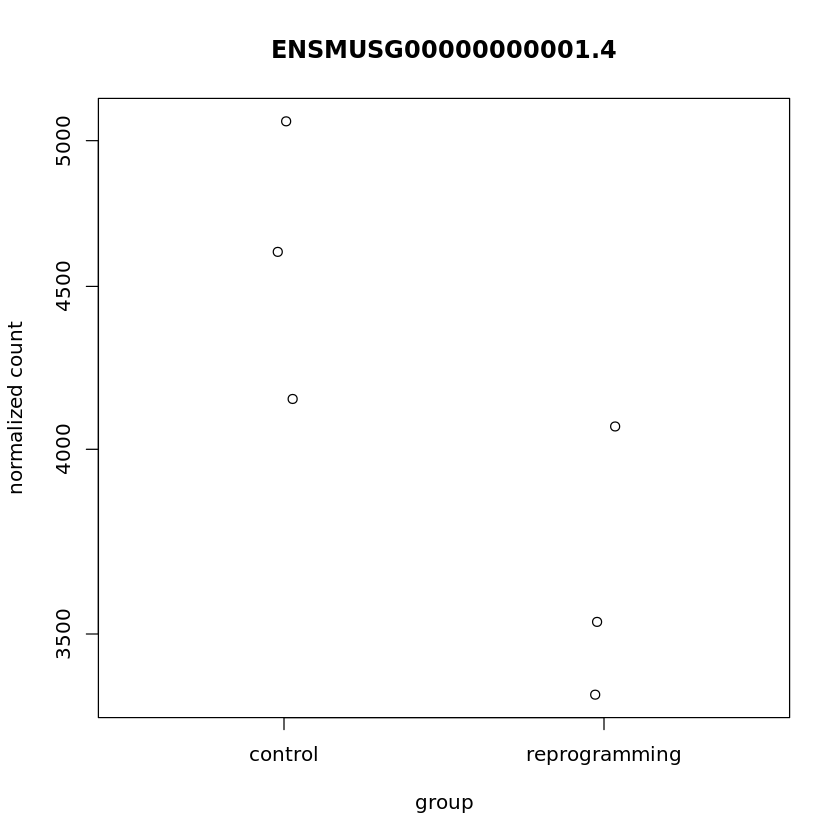

In [18]:
res[1,]
plotCounts(dds, gene=1, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                              baseMean     log2FoldChange             lfcSE
                             <numeric>          <numeric>         <numeric>
ENSMUSG00000000031.16 52426.1435855878 0.0378094049538729 0.123431459804842
                                   stat            pvalue              padj
                              <numeric>         <numeric>         <numeric>
ENSMUSG00000000031.16 0.306319029311112 0.759361751858052 0.853507328471868

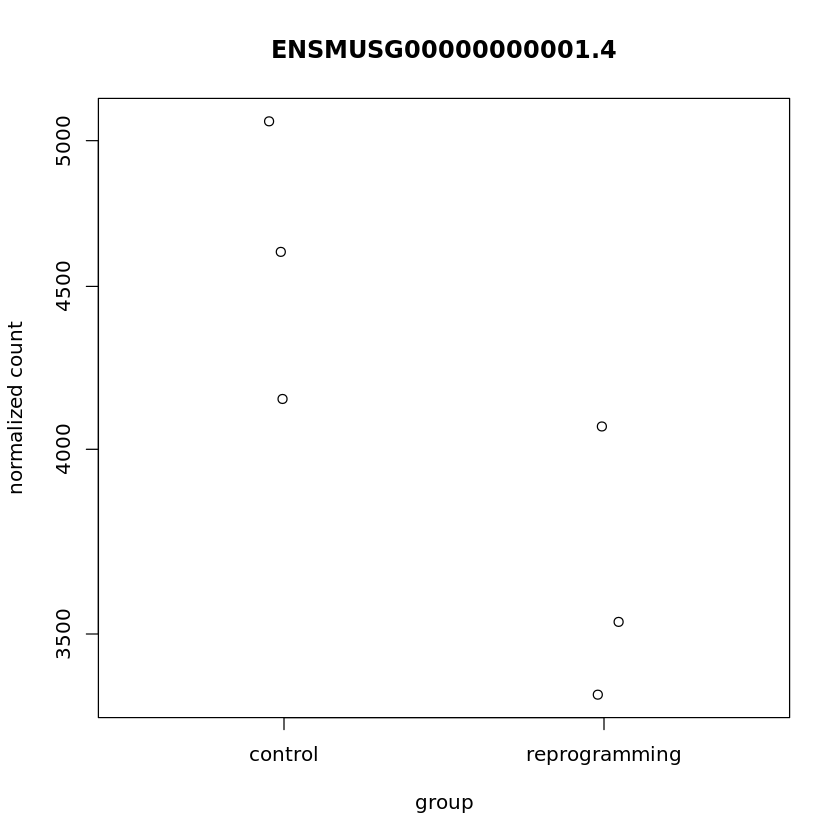

In [20]:
res[4,]
plotCounts(dds, gene=1, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                             baseMean    log2FoldChange             lfcSE
                            <numeric>         <numeric>         <numeric>
ENSMUSG00000000078.7 4714.02782422976 0.363376209703392 0.083079220404419
                                 stat               pvalue                 padj
                            <numeric>            <numeric>            <numeric>
ENSMUSG00000000078.7 4.37385194437939 1.22073186183698e-05 5.78516999241527e-05

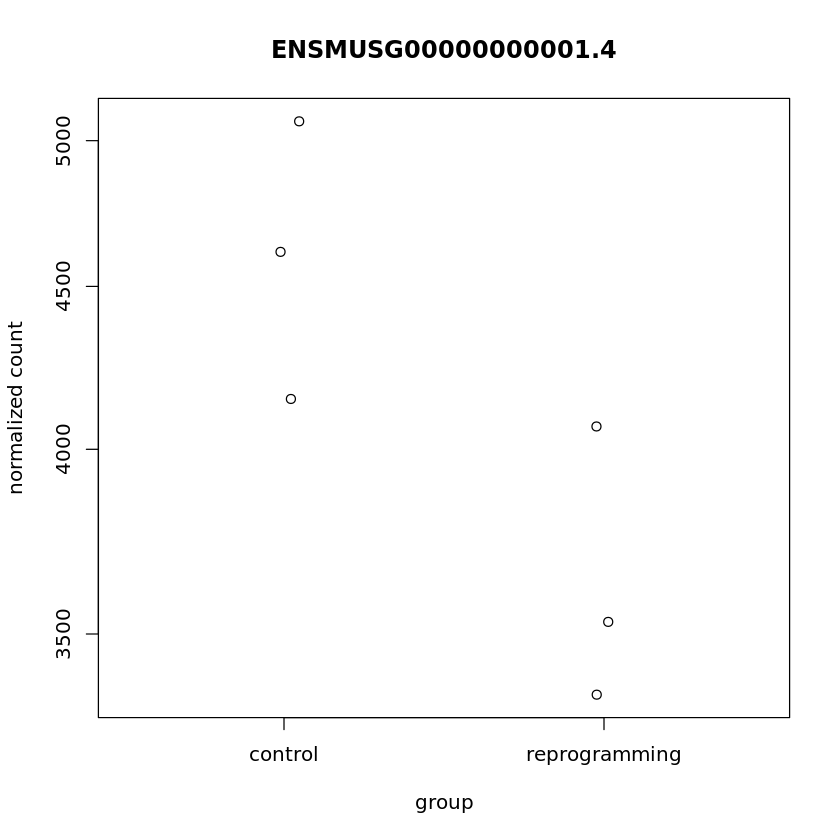

In [31]:
res[9,]
plotCounts(dds, gene=1, intgroup="condition")